<a href="https://colab.research.google.com/github/andree41/andree41.github.io/blob/main/cat_%26_dog_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
# download database
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
# upzip the file
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
# generators: divide data into badges
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels= 'inferred',
    label_mode ='int',
    batch_size= 32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels= 'inferred',
    label_mode ='int',
    batch_size= 32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# Normalize pixel values of images in training and validation datasets by dividing them by 255, converting to floats.
def process(image,label):
  image = tf.cast(image/255. , tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [7]:
# Create CNN model:  using the Keras Sequential model.
# It consists of three convolutional layers with max pooling, followed by flattening and three fully connected layers.
# The network is designed for image processing with an input shape of (256,256,3) and uses ReLU activation functions,
# except for the output layer which uses ReLU activation for regression-like output.
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3), padding='valid', activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='relu'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(train_ds, epochs=10, validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 64s 87ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 2/10
625/625 [==============================] - 52s 82ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 3/10
625/625 [==============================] - 54s 86ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 4/10
625/625 [==============================] - 51s 82ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 5/10
625/625 [==============================] - 72s 115ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 6/10
625/625 [==============================] - 65s 102ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 7/10
625/625 [==============================] - 53s 84ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accurac

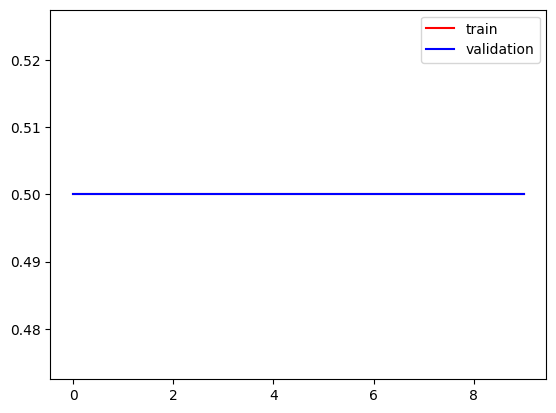

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label= 'train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

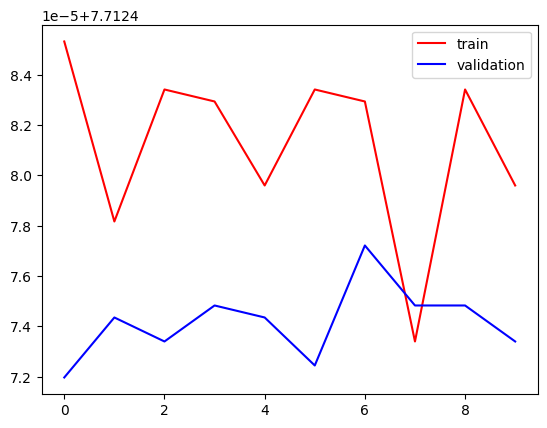

In [12]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [13]:
# ways to reduce overfitting

# add more data
# data augmentation
# L1/L2 regularizer
# dropout
# batch norm
# reduce complexity

In [14]:
import cv2

In [16]:
test_img = cv2.imread('/content/dog.jpeg')

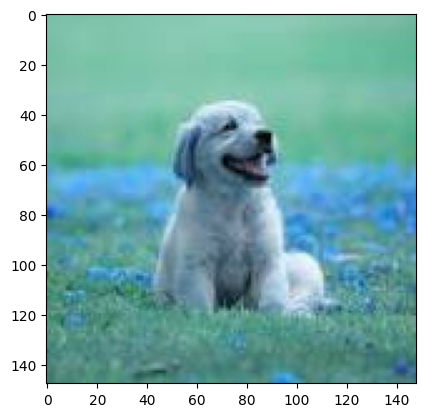

In [17]:
plt.imshow(test_img)

In [18]:
test_img.shape

(148, 148, 3)

In [19]:
test_img = cv2.resize(test_img,(256,256))

In [20]:
test_input = test_img.reshape((1,256,256,3))

In [21]:
model.predict(test_input)

1/1 [==============================] - 0s 485ms/step


array([[0.]], dtype=float32)

In [26]:
test_img2 = cv2.imread('/content/cat.jpeg')

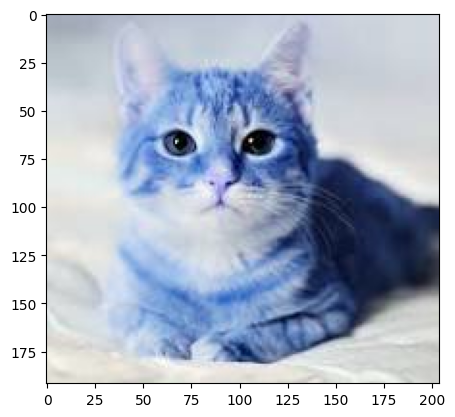

In [27]:
plt.imshow(test_img2)

In [28]:
test_img2.shape

(192, 204, 3)

In [29]:
test_img2 = cv2.resize(test_img,(256,256))

In [31]:
test_input2 = test_img2.reshape((1,256,256,3))

In [32]:
model.predict(test_input2)

1/1 [==============================] - 0s 26ms/step


array([[0.]], dtype=float32)